##### Installation Guide for Libraries
###### Required Libraries
###### Core data analysis and visualization stack
pip install pandas matplotlib seaborn

###### Additional utilities (usually installed with pandas)
pip install python-dateutil

In [50]:
#Import necessary python libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import seaborn as sns


In [51]:
# Load the data (assuming it's in a CSV file)
df = pd.read_csv('testin.csv')

# 1. Basic Data Structure Examination
print("BASIC DATA STRUCTURE")
print(f"Total records: {len(df)}")
print("\nData types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

BASIC DATA STRUCTURE
Total records: 2191

Data types:
Subject            object
body               object
date               object
from               object
sentiment_label    object
dtype: object

Missing values per column:
Subject            0
body               0
date               0
from               0
sentiment_label    0
dtype: int64


In [52]:
# 2. Date Data Preparation
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['year_month'] = df['date'].dt.to_period('M')
df['day_of_week'] = df['date'].dt.day_name()

# 3. Sender Analysis
sender_counts = df['from'].value_counts()

# 4. Weekend_emails Analysis
weekday_emails = df[~df['day_of_week'].isin(['Saturday', 'Sunday'])]
weekend_emails = df[df['day_of_week'].isin(['Saturday', 'Sunday'])]
counts = [len(weekday_emails), len(weekend_emails)]
labels = ['Weekday', 'Weekend']

# 4. Sentiment Analysis (based on  previous categorization)
df['category'] = df['sentiment_label']  #The result of sentiment_label from previous Spacy labeling


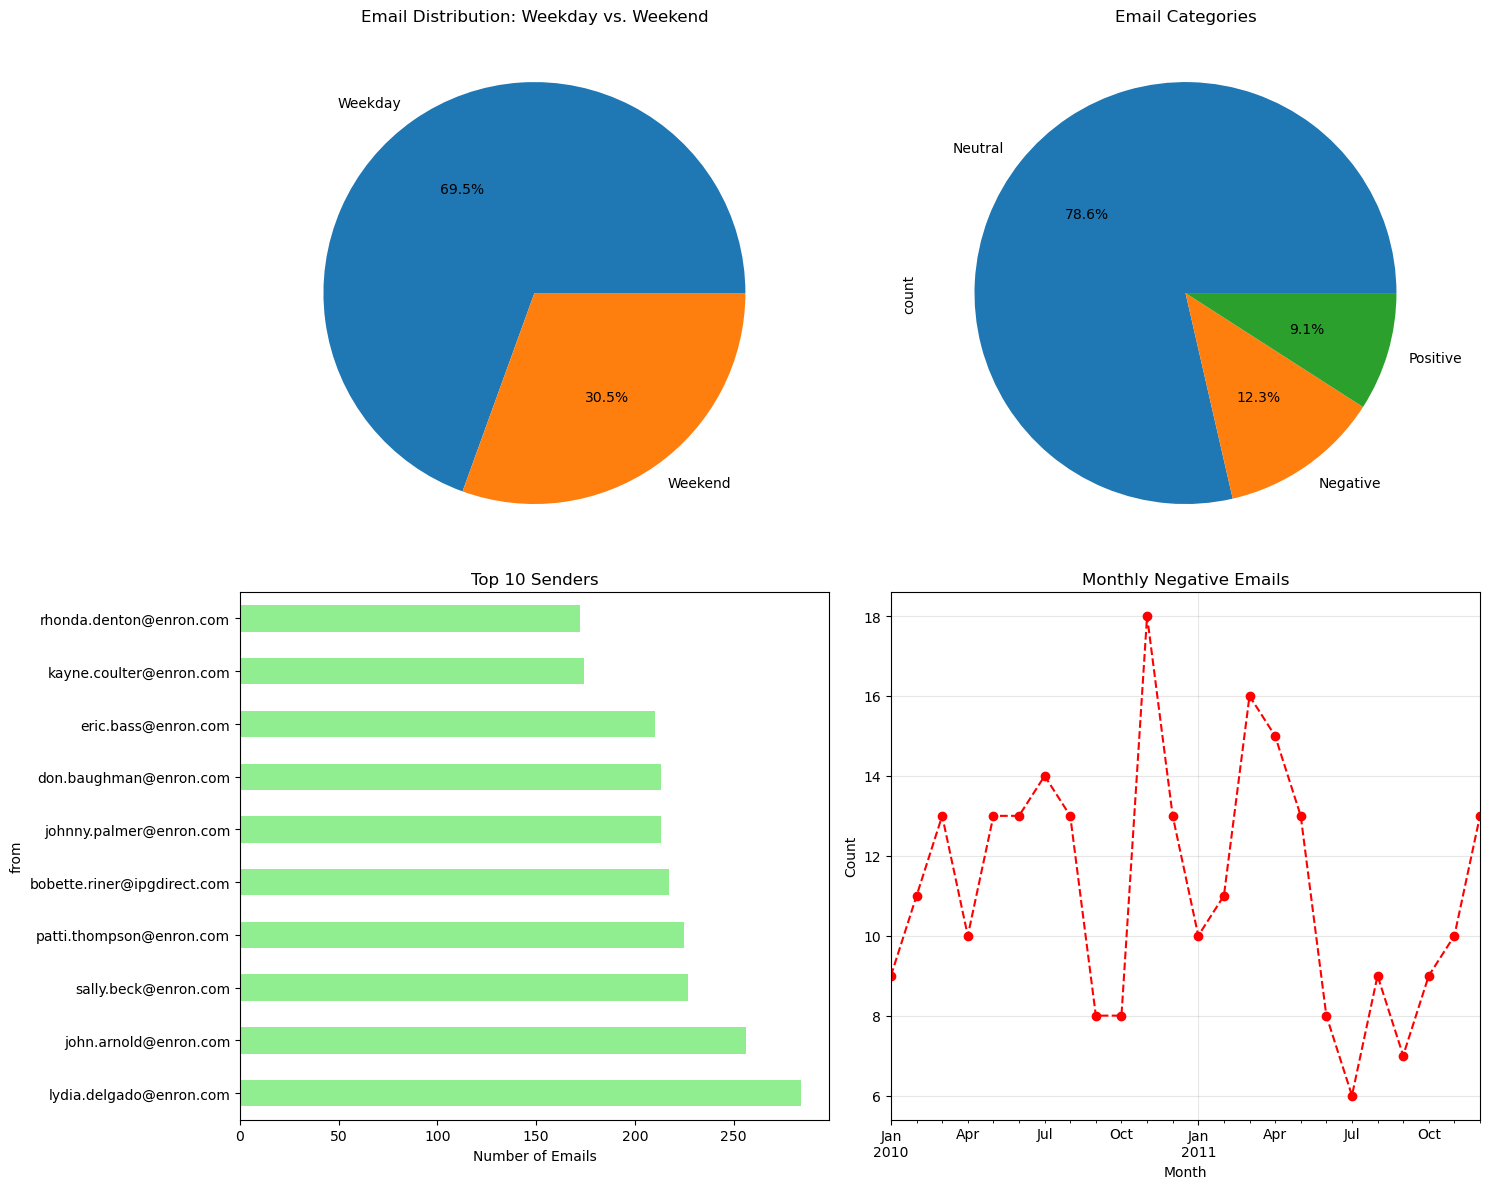

In [53]:
# 5. Visualization
plt.figure(figsize=(15, 12))

# Plot pie chart
plt.subplot(2, 2, 1)
plt.pie(counts, labels=labels,autopct='%.1f%%')
plt.title('Email Distribution: Weekday vs. Weekend')


# Plot 1: Email categories
plt.subplot(2, 2, 2)
df['category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Email Categories')


# Plot 3: Top senders
plt.subplot(2, 2, 3)
sender_counts.head(10).plot(kind='barh', color='lightgreen')
plt.title('Top 10 Senders')
plt.xlabel('Number of Emails')

# Plot 4: Monthly trends
plt.subplot(2, 2, 4)
negative_emails = df[df['category'] == 'Negative'] # Filter for only 'Conflict/Stress' category emails
negative_trend = negative_emails.groupby('year_month').size() # Group by month and count
negative_trend.plot(color='red', marker='o', linestyle='--') # Plot with red color to emphasize negative trend
plt.title('Monthly Negative Emails')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()

#Save it (if u need)
#plt.savefig('email_analysis.png', 
 #          dpi=300, 
 #         transparent=False)
plt.show()


=== ADDITIONAL INSIGHTS ===
Emails with no subject: 145
Average email length: 260 characters


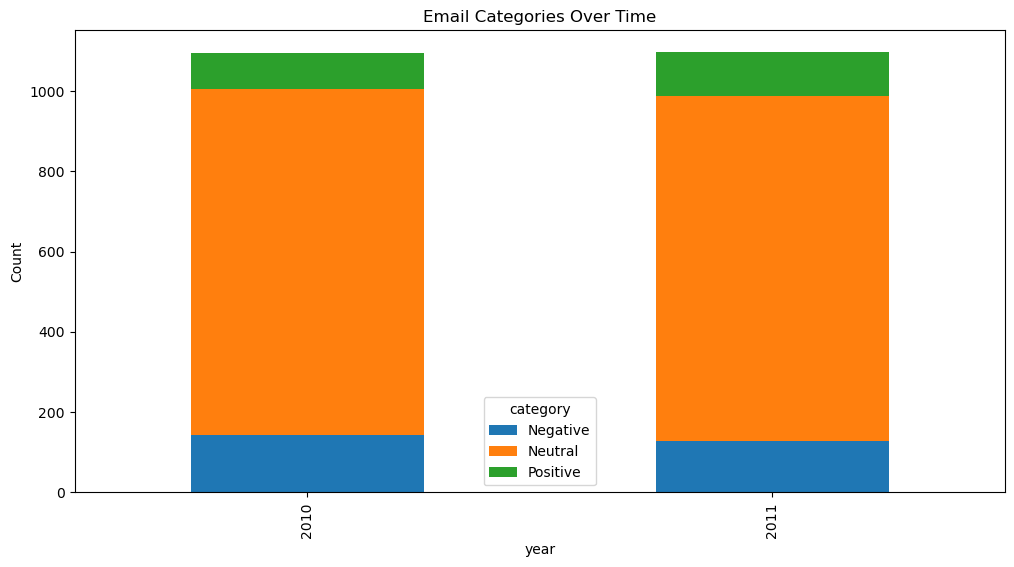

In [55]:

# 7. Additional analysis
print("\n=== ADDITIONAL INSIGHTS ===")
no_subject_email = df[df['Subject'].str.lower().str.contains('no subject', na=False)]
print(f"Emails with no subject: {len(no_subject_email)}")
print(f"Average email length: {df['body'].str.len().mean():.0f} characters")

# 8. Temporal patterns by category
category_trend = df.groupby(['year', 'category']).size().unstack()
category_trend.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Email Categories Over Time')
plt.ylabel('Count')

#save it (If u need)
#plt.savefig('Email Categories Over Time.png', 
#          dpi=300, 
#       transparent=False)

plt.show()
